In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from pyfolio.timeseries import perf_stats
import sys
sys.path.append('/home/tomek/ib_tools')
from blotter import MongoBlotter
%matplotlib inline

In [2]:
cash = 71964.76
df = MongoBlotter().read()
df.tail(30)

,_id,sys_time,time,contract,action,amount,price,exec_ids,order_id,perm_id,reason,commission,realizedPNL
1656,60478e0b1a3b1405c1e1f9d0,2021-03-09 16:02:35.890,2021-03-09 15:02:35.885,ESH1,BUY,1.0,3881.250000,[0000e1a7.6047274a.01.01],23,946277206,ENTRY,2.10,0.000000
1657,60478e0c1a3b1405c1e1f9d1,2021-03-09 16:02:36.046,2021-03-09 15:02:36.041,MESH1,BUY,3.0,3881.500000,[0000e1a7.6047274b.01.01],24,946277210,ENTRY,1.56,0.000000
1658,604798de1a3b1405c1e1f9ea,2021-03-09 16:48:46.743,2021-03-09 15:48:46.739,MNQH1,SELL,8.0,12702.125000,"[0000e1a7.604773b2.01.01, 0000e1a7.604773b3.01...",21,946277202,STOP-LOSS,4.16,528.680000
1659,6047aad91a3b1405c1e1fa1b,2021-03-09 18:05:29.279,2021-03-09 17:05:29.272,MNQH1,BUY,9.0,12753.472222,"[0000e1a7.60479ac6.01.01, 0000e1a7.60479acc.01...",29,946277217,ENTRY,4.68,0.000000
1660,6047cbc71a3b1405c1e1fa70,2021-03-09 20:25:59.423,2021-03-09 19:25:59.420,MNQH1,SELL,9.0,12804.083333,"[0000e1a7.6047c766.01.01, 0000e1a7.6047c767.01...",30,946277218,STOP-LOSS,4.68,901.640000
1661,6047d7531a3b1405c1e1fa8f,2021-03-09 21:15:15.786,2021-03-09 20:15:15.783,NQH1,BUY,1.0,12860.500000,[0000e1a7.6047d58f.01.01],32,946277222,ENTRY,2.10,0.000000
1662,6047ddab1a3b1405c1e1faa2,2021-03-09 21:42:19.182,2021-03-09 20:42:19.180,NQH1,SELL,1.0,12819.500000,[0000e1a7.6047e336.01.01],33,946277223,STOP-LOSS,2.10,-824.200000
1663,6048467c1a3b1405c1e1fbab,2021-03-10 05:09:32.251,2021-03-10 04:09:32.249,ESH1,SELL,1.0,3861.000000,[0000e1a7.60480ed0.01.01],25,946277211,STOP-LOSS,2.10,-1016.700000
1664,6048467e1a3b1405c1e1fbac,2021-03-10 05:09:34.412,2021-03-10 04:09:34.408,MESH1,SELL,3.0,3860.750000,[0000e1a7.60480ed2.01.01],27,946277213,STOP-LOSS,1.56,-314.370000
1665,6048cb791a3b1405c1e1fd03,2021-03-10 14:36:57.129,2021-03-10 13:36:57.116,MNQH1,BUY,8.0,12874.843750,"[0000e1a7.60484061.01.01, 0000e1a7.6048406d.01...",17,254302665,ENTRY,4.16,0.000000


In [3]:
start_date = '20210117'

In [4]:
#del df['sys_time']
del df['exec_ids']
del df['perm_id']
del df['_id']
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df['cash'] = df.realizedPNL.cumsum() + cash
df['contract'] = df['contract'].apply(lambda x: x[:-2])
micro_contracts = df[df.contract.str.startswith('M')]
macro_contracts = df[~df.contract.str.startswith('M')]
micro_contracts['amount'] /= 10
df = pd.concat([macro_contracts, micro_contracts]).sort_index()
df.contract = df.contract.str.strip('M')
df['contract'] = df['contract'].apply(lambda x: x[:2])
df.contract = df.contract.str.strip()
df = df.loc[start_date:]

In [5]:
c = set(df['contract'])
allocs = pd.Series([1/len(c)]*len(c) +[1], index=list(c) + ['total'])
#allocs = pd.Series([1/3, 2/3, 1], index=['ES','NQ', 'total'])
#allocs = pd.Series([.4, .125, .225, .25, 1], index=['NQ','ES', 'GC', 'YM', 'total'])

In [6]:
df.tail(10)

,sys_time,contract,action,amount,price,order_id,reason,commission,realizedPNL,cash
time,,,,,,,,,,
2021-03-11 18:57:27.824,2021-03-11 19:57:27.869,NQ,SELL,0.8,13059.375000,52,STOP-LOSS,4.16,839.180000,79561.140009
2021-03-12 08:32:54.425,2021-03-12 09:32:54.468,YM,SELL,0.8,32452.000000,27,STOP-LOSS,4.16,1407.680000,80968.820009
2021-03-12 08:34:17.224,2021-03-12 09:34:17.228,YM,SELL,1.0,32450.000000,25,STOP-LOSS,2.10,1735.800000,82704.620009
2021-03-12 10:56:36.622,2021-03-12 11:56:36.677,NQ,SELL,0.9,12826.166667,45,ENTRY,4.68,0.000000,82704.620009
2021-03-12 12:10:00.624,2021-03-12 13:10:00.630,NQ,BUY,0.9,12870.666667,46,STOP-LOSS,4.68,-810.360000,81894.260009
2021-03-12 14:37:53.288,2021-03-12 15:37:53.292,NQ,SELL,0.9,12810.777778,48,ENTRY,4.68,0.000000,81894.260009
2021-03-12 14:42:09.703,2021-03-12 15:42:09.718,NQ,BUY,0.9,12860.583333,49,STOP-LOSS,4.68,-905.859998,80988.400011
2021-03-12 14:55:30.876,2021-03-12 15:55:30.902,YM,BUY,2.0,32615.000000,51,ENTRY,4.20,0.000000,80988.400011
2021-03-12 15:28:23.156,2021-03-12 16:28:23.168,NQ,SELL,0.8,12779.125000,54,ENTRY,4.16,0.000000,80988.400011


In [7]:
allocs

NQ       0.333333
ES       0.333333
YM       0.333333
total    1.000000
dtype: float64

In [8]:
df.groupby('contract').realizedPNL.sum()

contract
ES    4666.170000
NQ   -3557.879997
YM    6755.940000
Name: realizedPNL, dtype: float64

In [9]:
df.realizedPNL.sum()

7864.230003000001

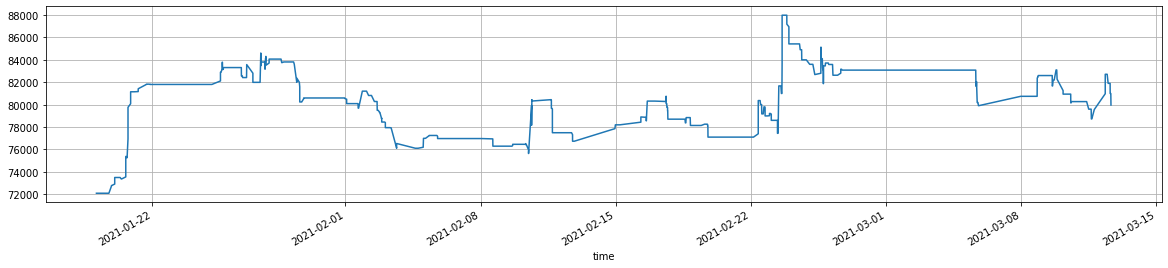

In [10]:
df.cash.plot(figsize=(20,4), grid=True);

In [11]:
by_contract = pd.pivot_table(df, values='realizedPNL', index=df.index, columns=['contract'])
by_contract['total'] = by_contract.sum(axis=1)

In [12]:
# number of trades
trades = df.groupby('contract').action.count()
trades, trades.sum()

(contract
 ES     38
 NQ    320
 YM     63
 Name: action, dtype: int64,
 421)

In [13]:
# trades per day
days = len(by_contract.resample('B').count().index)
trades/days, trades.sum()/days

(contract
 ES    0.974359
 NQ    8.205128
 YM    1.615385
 Name: action, dtype: float64,
 10.794871794871796)

In [14]:
# commission paid
df.groupby('contract').commission.sum()

contract
ES     92.58
NQ    760.00
YM    154.26
Name: commission, dtype: float64

In [15]:
df.commission.sum()

1006.8400000000001

In [16]:
# per trade stats (pro rated per macro contract)
exits = df[df.realizedPNL!=0]
dfs = {}
for contract in exits.contract.unique():
    dfs[contract] = exits[exits.contract == contract]
dfs['total'] = exits
results = pd.DataFrame(columns=['success_rate', 'average_PNL', 'average_gain', 'average_loss', 
                                'win_ratio', 'EV/contract', 'number_of_contracts'])
for c, d in dfs.items():
    row = pd.Series()
    row['success_rate'] = round((d[d.realizedPNL > 0]).realizedPNL.count() / d.realizedPNL.count(), 2)
    d['pnl_per_contract'] = d.realizedPNL / d.amount
    row['average_PNL'] = round(d['pnl_per_contract'].mean(), 2)
    row['average_gain'] = round((d[d.realizedPNL > 0])['pnl_per_contract'].mean(), 2)
    row['average_loss'] = round((d[d.realizedPNL < 0])['pnl_per_contract'].mean(), 2)
    row['win_ratio'] = round(abs(row['average_gain'] / row['average_loss']), 2)
    row['EV/contract'] = round((row['average_gain'] * row['success_rate']) + (
        row['average_loss'] * (1 - row['success_rate'])), 2)
    row['number_of_contracts'] = d.amount.sum()
    results.loc[c] = row
results

,success_rate,average_PNL,average_gain,average_loss,win_ratio,EV/contract,number_of_contracts
NQ,0.38,-23.09,786.17,-508.64,1.55,-16.61,111.5
ES,0.47,81.67,1551.60,-1241.27,1.25,71.38,15.7
YM,0.61,255.75,831.47,-655.81,1.27,251.43,28.9
total,0.42,27.55,874.23,-583.17,1.50,28.94,156.1


In [17]:
daily = by_contract.resample('B').sum()
daily = daily /  (allocs * cash)
#daily[['CL', 'ES', 'GC', 'NQ']].plot(figsize=(20,8), grid=True);

In [18]:
# instrument correlations
log_returns = np.log(daily + 1)
log_returns.corr()

,ES,NQ,YM,total
ES,1.000000,0.414403,-0.248306,0.807408
NQ,0.414403,1.000000,-0.540197,0.723945
YM,-0.248306,-0.540197,1.000000,-0.067105
total,0.807408,0.723945,-0.067105,1.000000


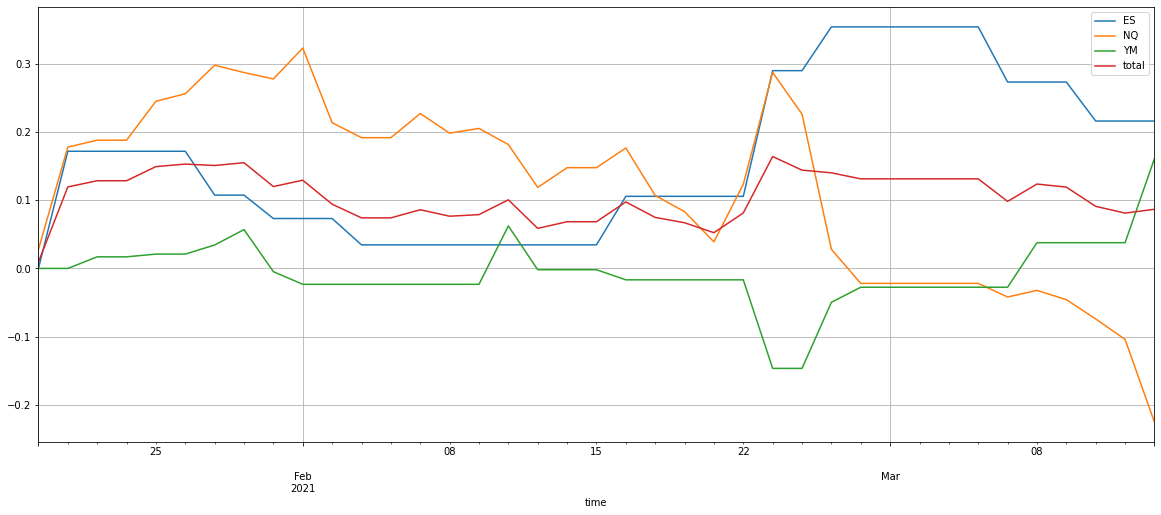

In [19]:
log_returns.cumsum().plot(figsize=(20,8), grid=True);

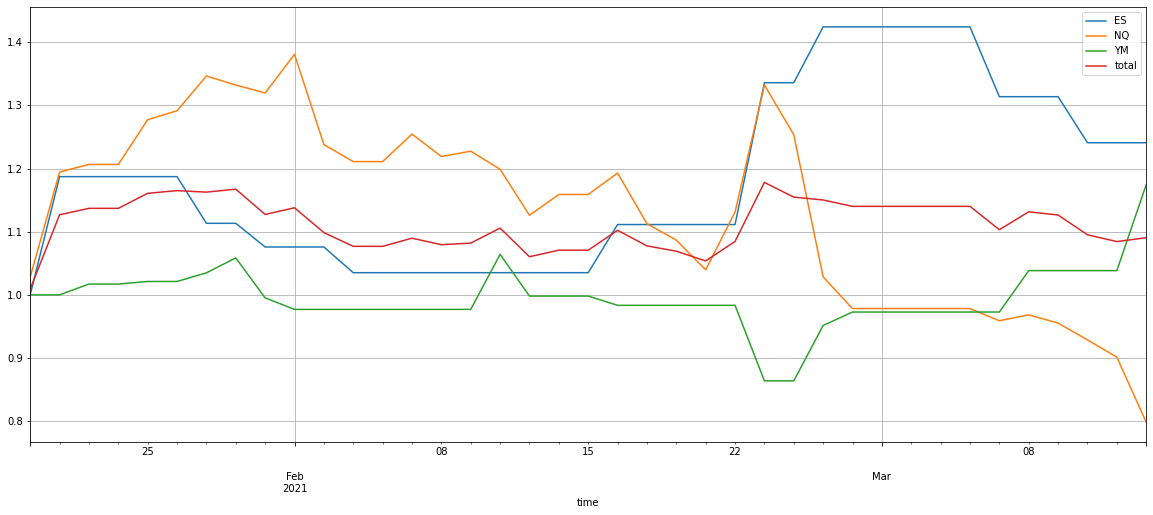

In [20]:
returns = daily.copy()
returns_index = (returns + 1).cumprod()
returns_index.plot(figsize=(20,8), grid=True);

In [21]:
stats = pd.DataFrame()
for col in daily.columns:
    stats[col] = perf_stats(daily[col])
stats

,ES,NQ,YM,total
Annual return,3.033743,-0.766676,1.826884,0.749843
Cumulative returns,0.240911,-0.201667,0.174479,0.090453
Annual volatility,0.812090,1.008473,0.648021,0.462608
Sharpe ratio,2.086742,-0.948363,1.918908,1.427931
Calmar ratio,23.557096,-1.817284,9.704656,7.701990
Stability,0.393877,0.613661,0.000080,0.000093
Max drawdown,-0.128783,-0.421880,-0.188248,-0.097357
Omega ratio,1.982962,0.832559,1.696074,1.349233
Sortino ratio,5.348446,-1.357811,3.241782,2.956442
Skew,2.491142,0.348460,0.447633,1.951367


In [22]:
# monthly returns in percent
monthly_log_returns = log_returns.resample('M').sum()
monthly_returns = np.exp(monthly_log_returns)-1
round(monthly_returns, 4) * 100

,ES,NQ,YM,total
time,,,,
2021-01-31,7.58,31.98,-0.48,12.74
2021-02-28,32.40,-25.87,-2.25,1.13
2021-03-31,-12.88,-18.40,20.73,-4.36


In [23]:
# total returns by contract in percent
round(np.exp(monthly_log_returns.sum())-1, 2)* 100

ES       24.0
NQ      -20.0
YM       17.0
total     9.0
dtype: float64

In [24]:
df.sort_values('realizedPNL', ascending=False)[['contract', 'action', 'price', 'realizedPNL']]

,contract,action,price,realizedPNL
time,,,,
2021-02-23 10:44:27.789,NQ,BUY,12987.00,4225.8
2021-02-22 09:11:44.623,NQ,BUY,13401.00,2960.8
2021-01-20 17:40:06.464,ES,SELL,3840.00,2808.3
2021-02-23 14:50:41.315,ES,BUY,3805.25,2695.8
2021-02-10 15:22:40.628,YM,SELL,31260.00,2520.8
...,...,...,...,...
2021-01-29 15:10:13.339,YM,BUY,30361.00,-1349.2
2021-02-03 15:38:06.366,ES,SELL,3808.75,-1391.7
2021-02-11 17:15:05.473,YM,SELL,31307.00,-1418.4


In [25]:
daily.sort_values('total', ascending=False)

,ES,NQ,YM,total
time,,,,
2021-01-20,0.187182,0.161669,0.000000,0.116284
2021-02-23,0.202077,0.178005,-0.121622,0.086153
2021-02-16,0.073644,0.029268,-0.014694,0.029406
2021-02-22,0.000000,0.087926,0.000000,0.029309
2021-03-08,0.000000,0.009771,0.067395,0.025722
2021-02-10,0.000000,-0.023350,0.089190,0.021947
2021-01-25,0.000000,0.058686,0.004032,0.020906
2021-02-05,0.000000,0.035960,0.000000,0.011987
2021-02-12,0.000000,0.029342,0.000000,0.009781
